In [1]:
#1. Run 3 simulations with mean of zero (results: 25, 15, 0%)
#2. Run 3 simulations without the mean zero, see if the agent gets directional
#3. Run 3 simulations without the mean zero with more timesteps, 10 times more
#4. Run 3 simulations with entire validation dataset

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')
%matplotlib inline
from stable_baselines3 import PPO, A2C
from IPython.display import clear_output

import glob

In [3]:
import sys
sys.path.append(r"C:\Users\fidel\OneDrive\Documentos\Mestrado\code")
from RL_trading_envs import StockWithVolCorr, process_data
from analysis import *

In [4]:
raw_env  = StockWithVolCorr

In [6]:
# path_data = r"D:\Datasets\TwoSigmaDataSetBr_2022_03_04\Papertrade_br\models\MlpVarianceSwap\trained_model\model_MlpVarianceSwap_2022-03-03\df_test_mestrado.pkl"
path_data = r"C:\Users\fidel\OneDrive\Documentos\Mestrado\code\complete_framework\df_merge.pkl"
df_valid, df_test = process_data(path_data, split_date = '2015-12-31')

In [7]:
#Subset of assets to symplify and make faster
# assets = [0, 38, 42, 45, 47, 48, 49, 51, 53, 95]
# assets = [53, 95]
# df_valid.query("asset_identifier.isin(@assets) & date < 100", inplace = True)
# df_valid.query("date < 100", inplace = True)
# df_valid.loc[:, 'target_return'] = df_valid.loc[:, 'target_return'] - df_valid.loc[:, 'target_return'].mean()
df_valid.reset_index(drop = True, inplace = True)
df_valid.shape

(10361, 8)

In [8]:
df_valid[['yhat', 'target_return']].corr()

,yhat,target_return
yhat,1.00000,0.03774
target_return,0.03774,1.00000


In [9]:
df_test[['yhat', 'target_return']].corr()

,yhat,target_return
yhat,1.000000,0.010694
target_return,0.010694,1.000000


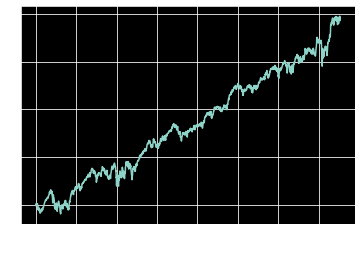

In [10]:
%matplotlib inline
# df_valid.loc[:, 'target_return'] = df_valid.groupby('asset_identifier')['target_return'].transform(lambda x: x/x.std())
# df_valid.loc[:, 'yhat'] = df_valid.loc[:, 'target_return'] /1e2
df_valid.groupby('date')['target_return'].sum().cumsum().plot()
plt.grid()

In [11]:
df_valid.query("date == 0")

,asset_identifier,date,rho,volatility,yhat,target_return,realized_return,date_backup
0,0,0,0.546029,0.017052,0.000213,-0.015906,0.001729,2010-01-05
1,1,0,0.691660,0.010965,0.000467,-0.005151,0.005178,2010-01-05
2,2,0,0.002384,0.019187,0.001309,-0.018116,0.005900,2010-01-05
3,3,0,0.376996,0.010297,0.000691,-0.006137,0.000323,2010-01-05
4,4,0,0.592130,0.010581,0.000888,0.000000,0.000000,2010-01-05
5,5,0,0.544607,0.003253,0.000742,0.008134,-0.011595,2010-01-05


In [12]:
%%time
# agent_parameters = dict(learning_rate=0.0003,
#                         n_steps=2048,
#                         batch_size=64,
#                         n_epochs=10)
# agent_parameters = {}
agent_parameters = {'n_steps': len(df_valid), 'seed': 1}
model = fit_rl_ppo(df_valid, agent_parameters, raw_env)
# df_results, env = evaluate_df_model(df_valid, model, raw_env)

43
0.09135095774653115
0.08804192031511696
0.20471731427623283
0.20686943563792953
0.22703688163175348
0.22722491352176197
NEW DAY: 1
0.2351051350186459
0.23521334904780108
0.23419135841407382
0.23130599025218274
0.24251763342269197
0.16964560614103932
NEW DAY: 2
0.12567185316109916
0.12540237851413158
0.126004201339687
0.1272544456201396
0.0651685202011178
0.06270306260616064
NEW DAY: 3
0.1791135723716474
0.17639173213627363
0.20759829849210554
0.20716717528090214
0.20261058429293283
0.22205970121142682
NEW DAY: 4
0.2016071303430731
0.20980055895083574
0.1320768746145002
0.13257735586626618
0.11090909571824727
0.12118223131999128
NEW DAY: 5
0.19715762972127376
0.19805199449194338
0.20459831280940358
0.2240068420565244
0.22406797213284652
0.21738372947496484
NEW DAY: 6
0.22629098704181347
0.20722792740307452
0.20582172044710353
0.11628564145761562
0.1169548569683609
0.14634700773393017
NEW DAY: 7
0.15012600355672598
0.21172524084788896
0.1944045098224955
0.2037428822177975
0.2036737944

KeyboardInterrupt: 

In [14]:
env = raw_env(df_valid)
model = PPO.load('models_save/model_ppo_60', env)

18.47883242460202
-- ** -- ** -- **
action correlation with yhat:   0.139486280311958
notional correlation with yhat: 0.015707549733729006
-- ** -- ** -- **


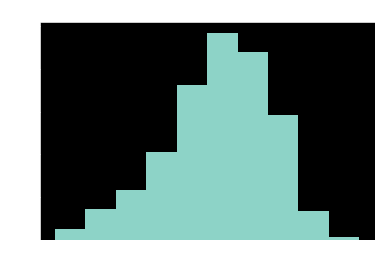

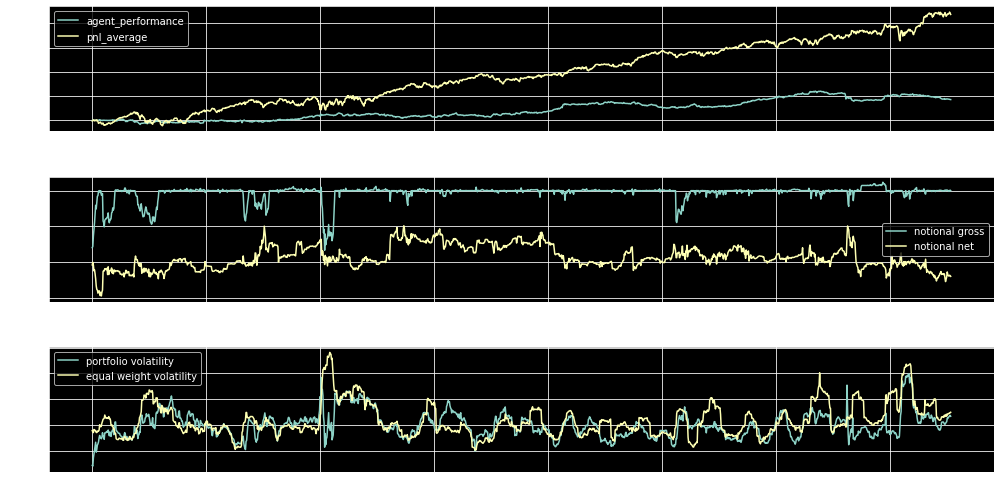

In [15]:
df_results, env = evaluate_df_model(df_valid, model, raw_env)

-47.98862840732383
-- ** -- ** -- **
action correlation with yhat:   0.13332670145987333
notional correlation with yhat: 0.038300346629776424
-- ** -- ** -- **


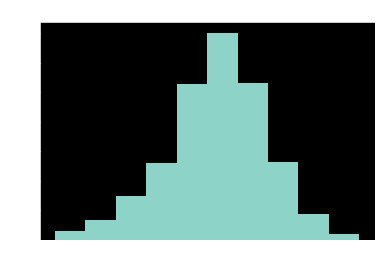

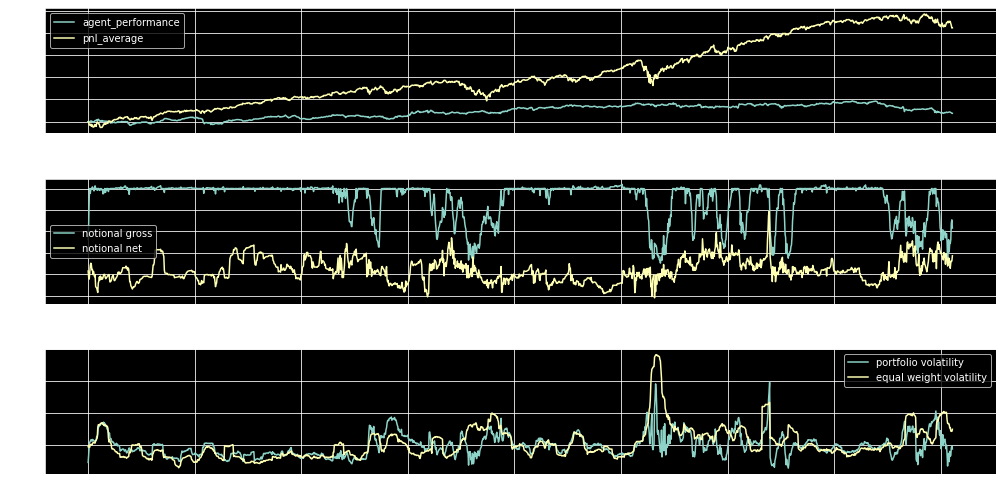

In [16]:
df_results, env = evaluate_df_model(df_test, model, raw_env)

In [32]:
# Modelo 58, resultados puro alpha
df_results.to_pickle('results_vol_penalization.pkl')

In [17]:
# Modelo 59, resultados puro beta
df_results.to_pickle('results_no_vol_penalization.pkl')

In [38]:
pnl = df_results.groupby('date_backup')['target_return'].sum()

In [39]:
pnl.mean() * 252

1.293920075520873

In [40]:
pnl.std() * 252**0.5

1.175681554125403

In [32]:
df_results.eval("variance = (notional * vol)**2", inplace = True)
port_var = df_results.groupby('date_backup')['variance'].sum()
port_vol = port_var**0.5

In [36]:
plt.style.use("classic")

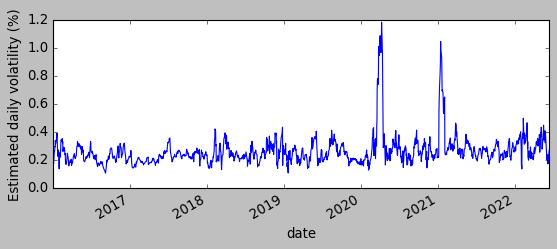

In [37]:
(100*port_vol).plot(figsize = (8,3), label = 'RL framework')
plt.xlabel("date")
plt.ylabel("Estimated daily volatility (%)")
plt.savefig("vol.jpeg")

In [12]:
%matplotlib inline
plt.style.use('classic')

In [16]:
pnl = df_results.groupby('date_backup')['pnl'].sum()
pnl.to_pickle('pnl_vol.pkl')
pnl_ew = df_results.groupby('date_backup')['target_return'].mean()

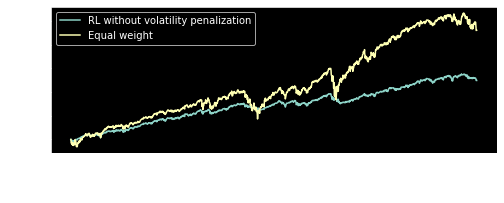

In [17]:
pnl.cumsum().plot(figsize = (8, 3), label = 'RL without volatility penalization')
pnl_ew.cumsum().plot(label = 'Equal weight')
plt.ylabel("cumulative return")
plt.xlabel("date")
plt.legend(loc = 'best')
# plt.savefig('pnl_no_vol.jpeg')

In [12]:
env = StockWithVolHold(df_valid)
model = PPO.load('models_save/model_ppo_46', env)

-9917.199207228243
-- ** -- ** -- **
action correlation with yhat:   0.6472970523419319
notional correlation with yhat: 0.19044133626876333
-- ** -- ** -- **


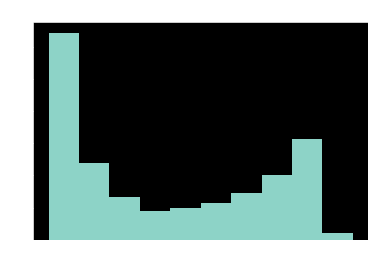

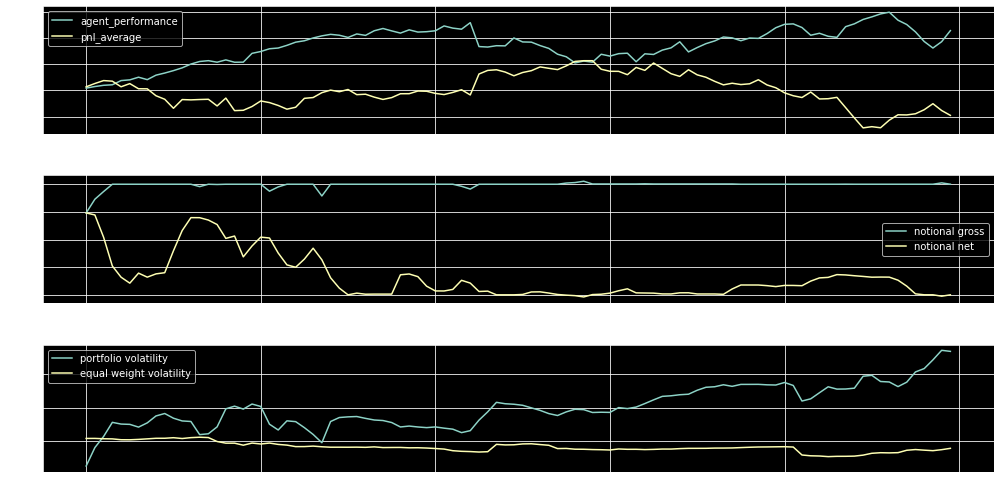

In [13]:
df_results, env = evaluate_df_model(df_valid, model, raw_env)

In [16]:
sum(env.rewards_memory)

5.483089243734869

In [46]:
df_results.eval("notional * target_return")

,asset_identifier,date,volatility,yhat,target_return,realized_return,notional,vol,action,average_notional,pnl,pnl_average,variance,average_variance
0,0,0,0.038638,0.000786,0.013671,-0.001332,0.015238,0.038638,0.015238,0.009824,0.000208,0.000134,3.466455e-07,1.440674e-07
1,1,0,0.028304,0.000890,-0.024857,0.061283,0.016861,0.028304,0.016861,0.009824,-0.000419,-0.000244,2.277473e-07,7.730993e-08
2,2,0,0.030811,0.000001,0.034091,0.053892,0.006233,0.030811,0.006233,0.009824,0.000212,0.000335,3.687673e-08,9.160953e-08
3,3,0,0.037893,0.000737,0.035714,0.089141,0.015122,0.037893,0.015122,0.009824,0.000540,0.000351,3.283568e-07,1.385670e-07
4,4,0,0.037269,-0.001005,0.007545,0.011886,-0.000232,0.037269,-0.000232,0.009824,-0.000002,0.000074,7.458654e-11,1.340393e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3074,75,29,0.026176,0.000072,-0.001365,0.000211,0.014656,0.026176,0.005231,0.009824,-0.000020,-0.000013,1.471800e-07,6.612040e-08
3075,23,29,0.035155,0.001779,0.049073,0.060116,0.013343,0.035155,0.015291,0.009824,0.000655,0.000482,2.200316e-07,1.192624e-07
3076,85,29,0.051172,0.001167,-0.012528,0.005727,0.000000,0.061641,0.013839,0.009824,-0.000000,-0.000123,0.000000e+00,3.666660e-07
3077,17,29,0.036820,-0.000900,-0.022805,-0.004348,0.005065,0.036820,-0.000416,0.009824,-0.000116,-0.000224,3.478331e-08,1.308310e-07


In [13]:
# df_valid = df_test

In [45]:
# %%time
# df_results, env = evaluate_df_model(df_valid, model)

In [26]:
df_results.loc[:, 'debug_notional'] = df_results.groupby('asset_identifier')['action'].cumsum()
df_results[['notional', 'debug_notional']].corr()

,notional,debug_notional
notional,1.000000,0.170719
debug_notional,0.170719,1.000000


In [70]:
df_results.query("asset_identifier == 0")[['asset_identifier', 'date', 'action', 'notional', 'realized_return', 'debug_notional']].head(30)

,asset_identifier,date,action,notional,realized_return,debug_notional
0,0,0,0.500000,0.500000,-0.001332,0.500000
10,0,1,0.500000,0.506836,0.013671,1.000000
27,0,2,0.500000,0.518673,0.023355,1.500000
37,0,3,0.500000,0.544181,0.049180,2.000000
47,0,4,-0.500000,0.063521,0.035539,1.500000
58,0,5,-0.500000,-0.062112,-0.022189,1.000000
69,0,6,-0.182677,-0.064818,0.043570,0.817323
72,0,7,-0.500000,-0.065025,0.003189,0.317323
88,0,8,-0.500000,-0.062318,-0.041618,-0.182677
99,0,9,0.500000,0.060420,-0.030458,0.317323


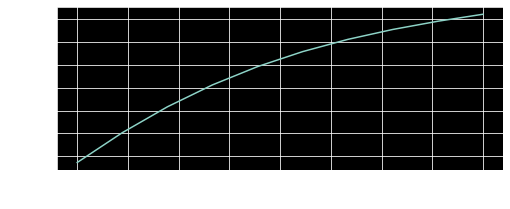

In [38]:
env = StockWithVolHold(df_valid)
features_base_values = {'portfolio_volatility': 0.5e-2,
                         'stock_volatility': 3e-2,
                         'stock_prediction': 0,
                         'available_notional': 0.5,
                         'stock_notional': -0.1}
sweep_dict = {'portfolio_volatility': np.linspace(0, 2e-2, 10)}
sweep_feature(model, env, features_base_values, sweep_dict)

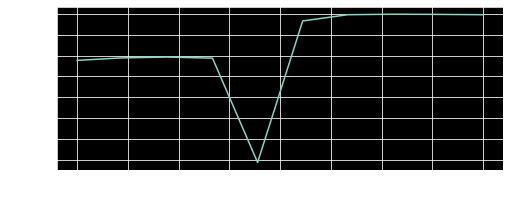

In [16]:
env = StockWithVolHold(df_valid)
features_base_values = {'portfolio_volatility': 0.5e-2,
                         'stock_volatility': 3e-2,
                         'stock_prediction': 0,
                         'available_notional': 0.5,
                         'stock_notional': 0}
sweep_dict = {'stock_prediction': np.linspace(-1e-2, 1e-2, 10)}
sweep_feature(model, env, features_base_values, sweep_dict)

In [18]:
obs = env.features_to_state(**features_base_values)

In [20]:
model.predict(obs, deterministic = True)

(array([0.05877535], dtype=float32), None)

In [34]:
model.predict(obs, deterministic = False)

(array([0.04015548], dtype=float32), None)

In [ ]:

df_valid.query("asset_identifier.isin(@assets) & date < 100", inplace = True)

In [228]:
# df_valid.loc[:, 'yhat'] = df_valid.loc[:, 'target_return'] * df_valid.loc[:, 'yhat'].std() / df_valid.loc[:, 'target_return']

In [285]:
env = StockWithVolHold(df_valid)
done = False
obs = env.reset()
list_hidden_state = []
list_actions = []
day = 0


In [292]:
while not done:#not done:
    action, _ = model.predict(obs, deterministic = True)
    obs, reward, done, hidden_state = env.step(action)
    if hidden_state:
        features = env.state_to_features(True)
        hidden_state = pd.DataFrame(hidden_state).T.reset_index()
        hidden_state.columns = ['asset_identifier', 'notional', 'vol']
        hidden_state.loc[:, 'date'] = day
        hidden_state.loc[:, 'available_notional'] = features['available_notional']
        day += 1
        list_hidden_state.append(hidden_state)
    list_actions.append(action.item())
    break

In [294]:
hidden_state

,asset_identifier,notional,vol,date,available_notional
0,0,0.005919,0.038638,3,0.930804
1,38,0.027566,0.020203,3,0.930804
2,42,0.025035,0.031282,3,0.930804
3,45,0.010676,0.030593,3,0.930804
4,47,0.000000,0.036182,3,0.930804
5,48,0.000000,0.038261,3,0.930804
6,49,0.000000,0.034463,3,0.930804
7,51,0.000000,0.037387,3,0.930804
8,53,0.000000,0.031885,3,0.930804
9,95,0.000000,0.031187,3,0.930804


In [293]:
env.hidden_state

{0: [0.005918771028518677, 0.038638038264672075],
 38: [0.027566347271203995, 0.020202822851253965],
 42: [0.025035196915268898, 0.03128218255953159],
 45: [0.010675615631043911, 0.030592537471042045],
 47: [0, 0.03618249744885325],
 48: [0, 0.03826130674505181],
 49: [0, 0.03446316551540053],
 51: [0, 0.03738650495596928],
 53: [0, 0.03188500333753538],
 95: [0, 0.031186834667256018]}

In [231]:
len(df_valid)

1000

In [232]:
len(list_actions)

1000

In [233]:
df_valid.loc[:, 'debug_action'] = list_actions

In [236]:
df_valid[['action', 'target_return']].corr()

,action,target_return
action,1.000000,0.654477
target_return,0.654477,1.000000


In [187]:
env.state_memory[4]

{'portfolio_volatility': 0.0033894920450542473,
 'stock_volatility': 0.03618249744885325,
 'stock_prediction': -2.063614738290198e-05,
 'available_notional': 0.7735168263316154,
 'stock_notional': 0.0}

In [191]:
-2.063614738290198e-05*10**2 * 0.034990157932043076 * 30

-0.002166186168109973

In [189]:
env.action_memory[4]

0.034990157932043076

In [190]:
env.rewards_memory[4]

-0.021661862139356163

In [72]:
np.array(env.rewards_memory)[1]/300

0.004535091687577896

In [69]:
df_results#['pnl'].sum()

,asset_identifier,date,volatility,yhat,target_return,realized_return,action,notional,vol,available_notional,average_notional,pnl,pnl_average,variance,average_variance
0,169,0,0.012409,0.001499,0.000376,-0.010584,1.000000,0.100092,0.012518,0.899908,0.979008,0.000038,0.000368,0.000002,0.000150
1,169,1,0.012518,0.001500,0.022665,0.000917,1.000000,0.204735,0.012516,0.795265,0.979008,0.004640,0.022189,0.000007,0.000150
2,169,2,0.012516,0.001443,0.017066,0.023206,1.000000,0.310100,0.013098,0.689900,0.979008,0.005292,0.016707,0.000016,0.000164
3,169,3,0.013098,0.001062,-0.018136,0.017607,1.000000,0.402885,0.013390,0.597115,0.979008,-0.007307,-0.017756,0.000029,0.000172
4,169,4,0.013390,0.000807,-0.008004,-0.017595,1.000000,0.499132,0.013245,0.500868,0.979008,-0.003995,-0.007836,0.000044,0.000168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,169,93,0.016396,0.001243,0.010522,0.001231,1.000000,1.097418,0.015479,-0.097418,0.979008,0.011547,0.010301,0.000289,0.000230
94,169,94,0.015479,0.001277,0.014657,0.011063,1.000000,1.114096,0.014573,-0.114096,0.979008,0.016329,0.014349,0.000264,0.000204
95,169,95,0.014573,0.001237,0.032692,0.015198,1.000000,1.151121,0.014786,-0.151121,0.979008,0.037633,0.032006,0.000290,0.000210
96,169,96,0.014786,0.001053,-0.015319,0.033233,1.000000,1.134109,0.014042,-0.134109,0.979008,-0.017374,-0.014998,0.000254,0.000189


In [65]:
df_valid

,asset_identifier,date,volatility,yhat,target_return,realized_return,action
0,169,0,0.012409,0.001499,0.000376,-0.010584,1.000000
1,169,1,0.012518,0.001500,0.022665,0.000917,1.000000
2,169,2,0.012516,0.001443,0.017066,0.023206,1.000000
3,169,3,0.013098,0.001062,-0.018136,0.017607,1.000000
4,169,4,0.013390,0.000807,-0.008004,-0.017595,1.000000
...,...,...,...,...,...,...,...
95,169,95,0.014573,0.001237,0.032692,0.015198,1.000000
96,169,96,0.014786,0.001053,-0.015319,0.033233,1.000000
97,169,97,0.014042,0.000361,-0.023776,-0.014778,0.554681
98,169,98,0.014109,0.000830,0.007890,-0.023235,1.000000


In [63]:
len(env.rewards_memory)

99

In [44]:
action

array([0.5515774], dtype=float32)

In [46]:
reward

0.07794904377806944

In [48]:
0.05515 * 0.004711 * 30

0.0077943495

In [45]:
df_results

,asset_identifier,date,volatility,yhat,target_return,realized_return,action,notional,vol,available_notional,average_notional,pnl,pnl_average,variance,average_variance
0,174,0,0.016943,0.001477,0.004711,-0.015242,0.551577,0.055158,0.016943,0.662693,0.129749,0.000260,0.000611,8.733162e-07,0.000005
1,169,0,0.012409,0.001499,0.000917,-0.010584,0.555019,0.055502,0.012409,0.662693,0.129749,0.000051,0.000119,4.743456e-07,0.000003
2,138,0,0.012833,0.001394,0.010950,-0.013163,0.540723,0.054072,0.012833,0.662693,0.129749,0.000592,0.001421,4.814812e-07,0.000003
3,125,0,0.015086,0.001692,-0.005073,-0.014355,0.573805,0.057381,0.015086,0.662693,0.129749,-0.000291,-0.000658,7.493260e-07,0.000004
4,50,0,0.013534,0.001556,0.009019,0.003961,0.560789,0.056079,0.013534,0.662693,0.129749,0.000506,0.001170,5.760537e-07,0.000003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
753,46,98,0.015907,0.000453,-0.013014,0.001715,0.109608,0.000000,0.016063,0.000000,0.129749,-0.000000,-0.001689,0.000000e+00,0.000004
754,174,98,0.017957,0.001148,0.008097,-0.021395,0.301400,0.199739,0.017957,0.000000,0.129749,0.001617,0.001051,1.286519e-05,0.000005
755,169,98,0.014109,0.000830,0.008431,-0.023235,0.036144,0.330228,0.014109,0.000000,0.129749,0.002784,0.001094,2.170781e-05,0.000003
756,50,98,0.021371,0.001276,-0.010926,0.018150,0.468095,0.053057,0.021371,0.000000,0.129749,-0.000580,-0.001418,1.285703e-06,0.000008


In [50]:
action, _ = model.predict(obs, deterministic = True)
obs, reward, done, hidden_state = env.step(action)

In [46]:
env.state_to_features(True)

{'portfolio_volatility': 0.0009162610978275228,
 'stock_volatility': 0.012409072890145388,
 'stock_prediction': 0.00149919418618083,
 'available_notional': 0.9459195919334888,
 'stock_notional': 0.0}

In [51]:
action

array([0.41854703], dtype=float32)

In [56]:
df_results['pnl'].sum()*30

5.265160101418453

In [ ]:
hidden_state = pd.concat(list_hidden_state)
return list_actions, hidden_state, env